In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
folderleman = "data/Sonde_Profondeur-Leman/"
folderbourget = "data/Sonde_Profondeur-Bourget/"

# list files csv in the folder
filesleman = [f for f in os.listdir(folderleman) if f.endswith('.csv')]
filesbourget = [f for f in os.listdir(folderbourget) if f.endswith('.csv')]

print(filesleman)
print(filesbourget)

['240326-WS-Leman-04-2024_2024-03-26_15-27-52-906.csv', '241105-WS-LemanSHL2-17-2024_2024-11-05_15-41-33-126.csv', '240220-WS-Leman-02-2024_2024-02-20_15-41-45-451.csv', '240528-WS-Leman-08-2024_2024-05-28_15-49-47-695.csv', '240408-WS-Leman-05-2024_2024-04-08_15-32-58-886.csv', '240424-WS-LemanSHL2-06-2024_2024-04-24_16-35-45-804.csv', '240923-WS-LemanSHL2-14-2024_2024-09-23_15-56-29-163.csv', '240715-WS-Leman-11-2024_2024-07-15_13-08-29-901.csv', '241021-WS-LemanSHL2-16-2024_2024-10-21_16-28-48-075.csv', '240618-WS-Leman-09-2024_2024-06-18_15-49-23-264.csv', '240903-WS-Leman-SHL2-13-2024_2024-09-03_16-36-13-767.csv', '240513-WS-Leman-07-2024_2024-05-13_16-15-35-107.csv', '241126-WS-LemanSHL2-18-2024_2024-11-26_16-10-28-533.csv', '240701-WS-Leman-10-2024_2024-07-01_15-54-28-598.csv', '241007-WS_LemanSHL2-15-2024_2024-10-07_15-19-39-719.csv', '240806-WS-Leman-12-2024_2024-08-06_15-54-39-264.csv', '240313-WS-Leman-03-2024_2024-03-13_15-09-35-043.csv', '241217-WS-LemanSHL2-19-2024_2024-1

In [3]:
filetoread = folderleman + filesleman[0]
print(filetoread)

def find_header_line(file_path, pattern="Date and Time;Seconds     ;Depth (m)                               ;"):
    """
    Returns the zero-based line index and the raw text of the first line
    that contains exactly the given pattern.
    """
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        for idx, raw in enumerate(f):
            # strip trailing newline but keep all spaces inside
            line = raw.rstrip('\n')
            if pattern in line:
                return idx, line
    raise ValueError(f"Header pattern not found: {pattern!r}")

idx, header = find_header_line(filetoread)

data = pd.read_csv(filetoread, sep=';', skiprows=idx, encoding='utf-8', error_bad_lines=False)
# Remove the third column
data = data.drop(data.columns[3], axis=1)
# Rename the columns
data.columns = ['Date', 'Time', 'Depth']
data.head(5)


data/Sonde_Profondeur-Leman/240326-WS-Leman-04-2024_2024-03-26_15-27-52-906.csv


/var/folders/t4/675nk54x5q32s6j8tnns51n40000gn/T/ipykernel_60069/2070707176.py:19: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(filetoread, sep=';', skiprows=idx, encoding='utf-8', error_bad_lines=False)


,Date,Time,Depth
0,26/03/2024 09:31:00,0.0,0.005
1,26/03/2024 09:31:01,1.0,-0.000
2,26/03/2024 09:31:02,2.0,0.020
3,26/03/2024 09:31:03,3.0,0.006
4,26/03/2024 09:31:04,4.0,0.006


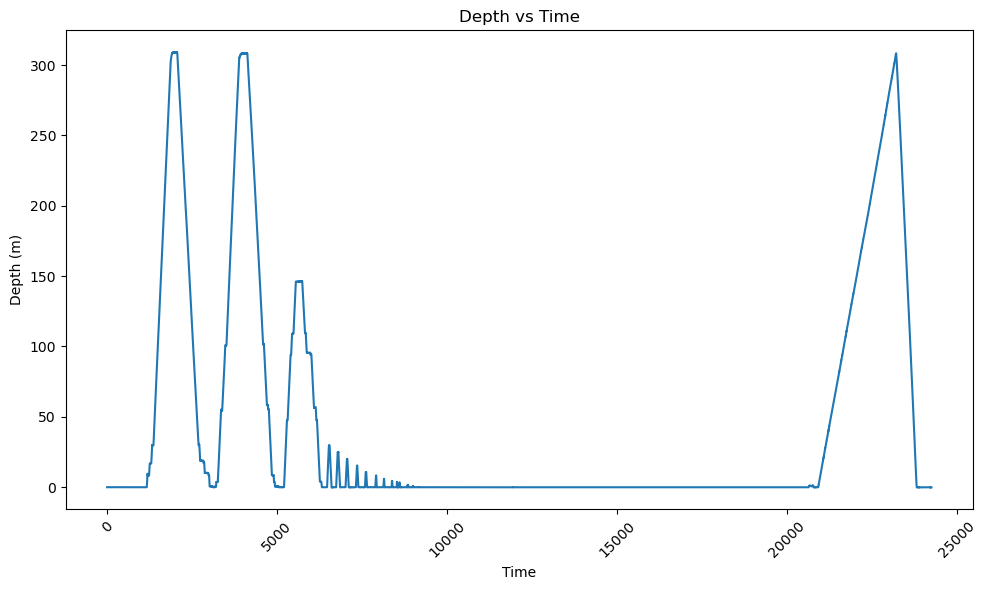

In [4]:
# Plot the data time vs depth
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Depth'])
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title('Depth vs Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

